Spam email - https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [199]:
import pandas as pd
import numpy as np

In [200]:
df = pd.read_csv('emails.csv', index_col=0)
df.shape



(5172, 3001)

"The last column has the labels for prediction : 1 for spam, 0 for not spam." -balaka18@kaggle

In [201]:
df_filtered = df[df['Prediction'] != 0]
df_filtered.shape

(1500, 3001)

Poistetaan täytesanoja (filler words)

In [202]:
words = [
    "um", "uh", "like", "actually", "basically", "well", "so", "right", "okay", "anyways", "look", "listen", "frankly", 
    "literally", "just", "perhaps", "thing", "stuff", "definitely", "certainly", "surely", "absolutely", "totally", 
    "completely", "utterly", "essentially", "fundamentally", "practically", "virtually", "nearly", "almost", "about", 
    "around", "approximately", "roughly", "someway", "somehow", "sometime", "sometimes", "occasionally", "often", 
    "frequently", "regularly", "usually", "typically", "generally", "mainly", "mostly", "largely", "particularly", 
    "especially", "specifically", "expressly", "explicitly", "precisely", "exactly", "merely", "simply", "only", 
    "solely", "probably", "maybe", "possibly", "seemingly", "apparently", "ostensibly", "evidently", "presumably", 
    "assumably", "likely", "quite", "rather", "somewhat", "partly"
    ]

# Poistetaan sarakkeet, joiden nimet ovat yksittäisiä kirjaimia tai sisältävät poistettavia sanoja
df_filtered = df_filtered.loc[:, 
    (df_filtered.columns.str.len() >= 2 ) &  # <-- SARAKKEEN NIMEN PITUUS ON 2+ MERKKIÄ, poistetaan a,b,c,..
    (~df_filtered.columns.isin(words))
]
df_filtered

,the,to,ect,and,for,of,you,hou,in,on,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 6,4,5,1,4,2,3,1,0,16,12,...,0,0,0,0,0,0,0,0,0,1
Email 8,0,2,2,3,1,2,6,0,2,6,...,0,0,0,0,0,0,0,1,0,1
Email 17,3,1,2,2,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
Email 18,36,21,6,14,7,17,25,5,59,37,...,0,0,0,0,0,0,0,3,0,1
Email 26,12,53,2,14,18,14,0,2,86,50,...,0,0,0,0,0,0,0,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Email 5163,2,3,1,2,1,2,0,0,7,3,...,0,0,0,0,0,0,0,0,0,1
Email 5164,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Email 5167,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [203]:
lyhyet = df_filtered.loc[:, (df_filtered.columns.str.len() >= 2) & (df_filtered.columns.str.len() <= 3) ]
lyhyet_sanat = lyhyet.shape[1]
lyhyet_sanat
#print(f"Number of columns: {num_columns}")

399

In [204]:
keski = df_filtered.loc[:, (df_filtered.columns.str.len() >= 4) & (df_filtered.columns.str.len() <= 6) ]
keski_sanat = keski.shape[1]
keski_sanat

1359

In [205]:
keskisuuret = df_filtered.loc[:, (df_filtered.columns.str.len() >=7) & (df_filtered.columns.str.len() <= 9) ]
keskisuuret_sanat = keskisuuret.shape[1]
keskisuuret_sanat

924

In [206]:
suurimmat = df_filtered.loc[:, (df_filtered.columns.str.len() >=10) ]
suurimmat_sanat = suurimmat.shape[1]
suurimmat_sanat

264

In [207]:
# sanojen esiintyvyys roskapostissa keskiarvo
column_means = df_filtered.mean()

print("Sana esiintyy keskimäärin (x kertaa roskapostissa):\n",column_means.head)

Sana esiintyy keskimäärin (x kertaa roskapostissa):
 <bound method NDFrame.head of the           6.559333
to            7.012667
ect           2.479333
and           4.157333
for           3.102000
                ...   
military      0.020667
allowing      0.005333
ff            1.504000
dry           0.006000
Prediction    1.000000
Length: 2946, dtype: float64>


In [208]:
# Sort columns by their mean in descending order
sorted_top = column_means.sort_values(ascending=False)

# Print top 10
print("10 useiten esiintyvää sanaa (määrä per roskaposti):")
print(sorted_top.head(10))

10 useiten esiintyvää sanaa (määrä per roskaposti):
in    15.247333
th    12.942667
re    12.554667
on    12.540000
an    12.206667
or     9.672667
he     9.648667
at     8.784000
ti     8.564667
en     8.290667
dtype: float64


In [209]:
# Sort columns by their mean in ascending order
sorted_bot = column_means.sort_values(ascending=True)

# Print bottom 10
print("10 harvinaisinta esiintyvää (määrä per roskaposti):")
print(sorted_bot.head(10))

10 harvinaisinta esiintyvää (määrä per roskaposti):
enron           0.0
connevey        0.0
pooling         0.0
offsystem       0.0
dorcheus        0.0
assigned        0.0
invoices        0.0
sitara          0.0
enronavailso    0.0
alland          0.0
dtype: float64


In [210]:
# threshold voidaan määritellä manuaalisesti raja-arvo, esim tulostetaan väh. ka 9 krt per spam olevat
threshold = 9
sort_man = df_filtered.loc[:, column_means >= threshold]
print(sort_man)

            in  on  or  re  an  th  he
Email No.                             
Email 6     16  12  10  20   8  10   8
Email 8      2   6   5   9   7   1   1
Email 17     1   1   1   1   5   4   3
Email 18    59  37  15  38  32  62  39
Email 26    86  50  68  29  52  29  14
...         ..  ..  ..  ..  ..  ..  ..
Email 5163   7   3   3   3   6   3   3
Email 5164   0   0   1   0   0   0   0
Email 5167   0   0   0   0   2   1   4
Email 5170   1   1   1   0   2   1   1
Email 5171   8  11   5   3   3   5   2

[1500 rows x 7 columns]


In [211]:
# sanojen määrä. lyhyet 2-3, keski 4-6, keskisuuret 7-9, suurimmat >= 10. tulos = sarakkeiden määrä
lyhyet_sanat
keski_sanat
keskisuuret_sanat
suurimmat_sanat

yhteensa = lyhyet_sanat + keski_sanat + keskisuuret_sanat + suurimmat_sanat
print("yhteensä:", yhteensa)

a = lyhyet_sanat/yhteensa * 100
b = keski_sanat/yhteensa * 100
c = keskisuuret_sanat/yhteensa * 100
d = suurimmat_sanat/yhteensa *100
print(a)
print(b)
print(c)
print(d)

yhteensä: 2946
13.54378818737271
46.13034623217923
31.364562118126273
8.961303462321792


Text(0.5, 1.0, 'Sanojen pituus, str.len()')

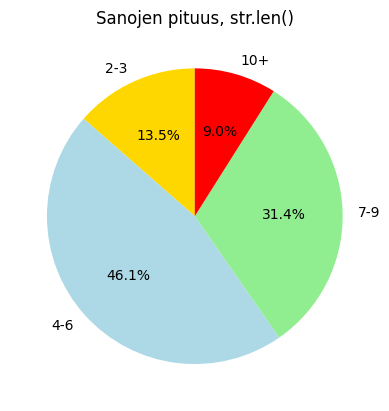

In [212]:

import matplotlib.pyplot as plt

labels = ['2-3', '4-6', '7-9', '10+']
sizes = [a, b, c, d]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue', 'lightgreen', 'red'])
plt.title("Sanojen pituus, str.len()")

In [213]:
# # asdfadsf


# import matplotlib.pyplot as plt
 
# # Esimerkkitiedot pylväsdiagrammia varten
# poistetut_sanat = 75  # Kaikki listan täytesanat poistetaan
# jätetyt_sanat = 2946
# kaikki_sanat = 3001  # Alkuperäinen sanojen määrä
 
# # Laskelmat
# yhteensa = poistetut_sanat + jätetyt_sanat
# print("yhteensä: ", yhteensa)
 
# a = (poistetut_sanat / yhteensa) * 100
# b = (jätetyt_sanat / yhteensa) * 100
# c = (kaikki_sanat / yhteensa) * 100
 
# print(f"Poistetut sanat: {a:.2f}%")
# print(f"Jätetyt sanat: {b:.2f}%")
# print(f"Kaikki sanat: {c:.2f}%")
 
# # Data pylväsdiagrammiin
# categories = ["Poistetut sanat", "Jätetyt sanat", "Kaikki sanat"]
# values = [poistetut_sanat, jätetyt_sanat, kaikki_sanat]
# percentages = [a, b, c]
 
# # Funktio pylväsdiagrammin luomiseen
# def piirra_pylvasdiagrammi(categoriat, arvot, prosentit, otsikko="Pylväsdiagrammi"):
#     plt.bar(categoriat, arvot, color='skyblue')
#     for i, (arvo, prosentti) in enumerate(zip(arvot, prosentit)):
#         plt.text(i, arvo + 50, f"{prosentti:.1f}%", ha='center')
#     plt.xlabel("Kategoria")
#     plt.ylabel("Sanojen määrä")
#     plt.title(otsikko)
#     plt.show()



In [214]:
kaikki_postit = df.shape[1]
pelkka_spam = df_filtered.shape[1]
poist_sanat = len(words)
print(kaikki_postit, " ", pelkka_spam, " ", poist_sanat)


3001   2946   74


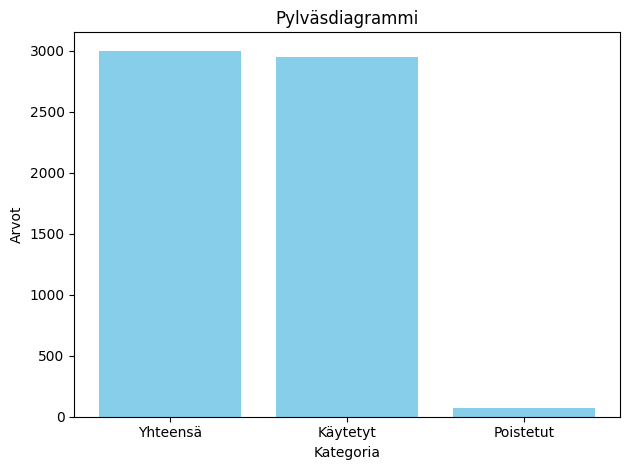

In [215]:
# asdf


import pandas as pd
import matplotlib.pyplot as plt


data = {'Sarake1': [1, 2, 3, 4], 'Sarake2': [5, 6, 7, 8]}
df = pd.DataFrame(data)

# kaikki_postit = df.shape[1]
# pelkka_spam = df_filtered.shape[1]
# poist_sanat = len(words)

# Pylväsdiagrammi
categories = ['Yhteensä', 'Käytetyt', 'Poistetut']
values = [kaikki_postit, pelkka_spam, poist_sanat]

plt.bar(categories, values, color='skyblue')
plt.title("Pylväsdiagrammi")
plt.xlabel("Kategoria")
plt.ylabel("Arvot")
plt.tight_layout()
plt.show()

Alla vanha versio

In [216]:
asdf1 = df_filtered['for'].mean()
asdf2 = df_filtered['ect'].mean()
asdf3 = df_filtered['to'].mean()
asdf4 = df_filtered['and'].mean()
asdf5 = df_filtered['the'].mean()

print(asdf1, asdf2, asdf3, asdf4, asdf5)

3.102 2.4793333333333334 7.012666666666667 4.157333333333334 6.559333333333333


C:\Users\OMISTAJA\AppData\Local\Temp\ipykernel_24512\1763531296.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


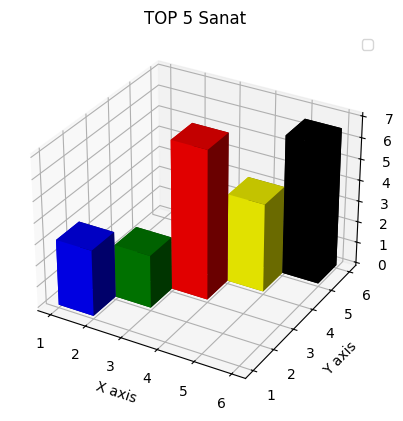

In [217]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Luo 3D-akselit
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Olemassa olevat pylväät
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
z = np.zeros(5)  # Pohja
dx = np.ones(5)
dy = np.ones(5)
dz = [asdf1, asdf2, asdf3, asdf4, asdf5]
colors = ['blue', 'green', 'red', 'yellow', 'black']
# Piirretään olemassa olevat pylväät
ax.bar3d(x, y, z, dx, dy, dz, color=colors)

# Uudet pylväät
# x_new = [5.2, 7]
# y_new = [4, 5]
# dz_new = [6, 2]
# ax.bar3d(x_new, y_new, z[:2], dx[:2], dy[:2], dz_new, color='blue', label='the, to')

# Akselit ja otsikko
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('TOP 5 Sanat')
ax.legend()

plt.show()

C:\Users\OMISTAJA\AppData\Local\Temp\ipykernel_24512\3284684512.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


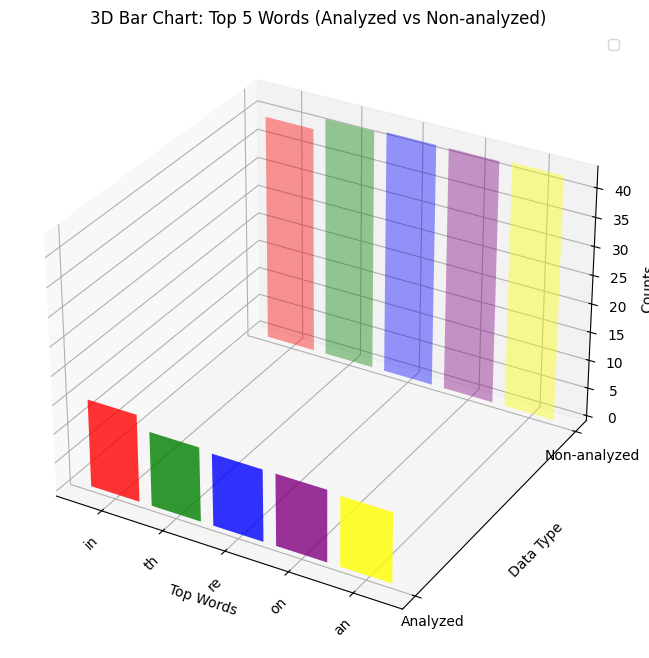

In [218]:
top_5_words = sorted_top.head(5).index.tolist()
analyzed_counts = sorted_top.head(5).values.tolist()
non_analyzed_counts = [
    kaikki_postit - pelkka_spam - count for count in analyzed_counts
]
 
# Create x positions for each word
x_pos = range(len(top_5_words))
 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
 
# Plot bars for analyzed data
#ax.bar(x_pos, analyzed_counts, zs=1, zdir='y', color='blue', alpha=0.8, label='Analyzed Data')
 
# Plot bars for non-analyzed data
#ax.bar(x_pos, non_analyzed_counts, zs=2, zdir='y', color='orange', alpha=0.8, label='Non-analyzed Data')
 
colors = ['red', 'green', 'blue', 'purple', 'yellow']
for i, color in enumerate(colors):
    ax.bar([x_pos[i]], [analyzed_counts[i]], zs=1, zdir='y', color=color, alpha=0.8)
    ax.bar([x_pos[i]], [non_analyzed_counts[i]], zs=2, zdir='y', color=color, alpha=0.4)
 
# Labels and Title
ax.set_xlabel('Top Words')
ax.set_ylabel('Data Type')
ax.set_zlabel('Counts')
ax.set_xticks(x_pos)
ax.set_xticklabels(top_5_words, rotation=45)
ax.set_yticks([1, 2])
ax.set_yticklabels(['Analyzed', 'Non-analyzed'])
ax.set_title('3D Bar Chart: Top 5 Words (Analyzed vs Non-analyzed)')
ax.legend()
 
plt.show()
 

In [219]:
# import pandas as pd

# # Lue data
# df = pd.read_csv('emails.csv', index_col=0)

# # Poistetaan rivit, joissa 'Prediction' sarakkeen arvo on 0
# df_filtered = df[df['Prediction'] != 0]

# # Lista poistettavista sanoista
# words = words = [
#     "um", "uh", "like", "actually", "basically", "well", "so", "right", "okay", "anyways", "look", "listen", "frankly", 
#     "literally", "just", "perhaps", "thing", "stuff", "definitely", "certainly", "surely", "absolutely", "totally", 
#     "completely", "utterly", "essentially", "fundamentally", "practically", "virtually", "nearly", "almost", "about", 
#     "around", "approximately", "roughly", "someway", "somehow", "sometime", "sometimes", "occasionally", "often", 
#     "frequently", "regularly", "usually", "typically", "generally", "mainly", "mostly", "largely", "particularly", 
#     "especially", "specifically", "expressly", "explicitly", "precisely", "exactly", "merely", "simply", "only", 
#     "solely", "probably", "maybe", "possibly", "seemingly", "apparently", "ostensibly", "evidently", "presumably", 
#     "assumably", "likely", "quite", "rather", "somewhat", "partly"
#     ]

# # remove_words = [
# #     "the", "to", "ect", "and", "for", "of", "a", "you", "hou", "in", "on", "is", 
# #     "this", "enron", "i", "be", "that", "will", "have", "with", "your", "at", 
# #     "we", "s", "are", "it", "by", "com", "as", "from", "gas", "or", "not", 
# #     "me", "deal", "if", "meter", "hpl", "please", "re", "e", "any", "our", 
# #     "corp", "can", "d", "all", "has", "was", "know", "need", "an", "forwarded", 
# #     "new", "t", "may", "up", "j", "mmbtu", "should", "do", "am", "get", "out", 
# #     "see", "no", "there", "price", "daren", "but", "been", "company"
# # ]

# # Poistetaan sarakkeet, joiden nimet ovat yksittäisiä kirjaimia tai sisältävät poistettavia sanoja
# df_filtered = df_filtered.loc[:, 
#     (df_filtered.columns.str.len() >= 7 )& (df_filtered.columns.str.len() <= 9) &  # <-- SARAKKEEN NIMEN PITUUS ON YLI X
#     (~df_filtered.columns.isin(words))
# ]

# #  & (df_filtered.columns.str.len() <= 9)  <--- lisää tämä str.len() jos haluat tietyn pituisia esim. 4-6

# # Asetetaan keskiarvon raja-arvo
# threshold = 5

# # Laske sarakkeiden keskiarvot
# column_means = df_filtered.mean()

# # Poistetaan sarakkeet, joiden keskiarvo on alle raja-arvon
# df_filtered = df_filtered.loc[:, column_means <= threshold]

# # Tulostetaan lopullinen taulu ja sarakkeiden keskiarvot
# print("Lopullinen taulu:")
# print(df_filtered)

# print("\nSarakkeiden keskiarvot:")
# print(column_means[column_means >= threshold])

Alla 3d plot yritys

In [220]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection = '3d')
 
# x = [1, 2, 3]
# y = np.random.randint(10, size=3)
# z = np.zeros(3)
 
# dx = np.ones(3)
# dy = np.ones(3)
# dz = [1, 2, 3]
 
# ax.bar3d(x, y, z, dx, dy, dz, color='g')
 
# ax.set_xlabel('x axis')
# ax.set_ylabel('y axis')
# ax.set_zlabel('z axis')
# plt.title("3D Bar Chart Example")
# plt.tight_layout()
# plt.show()